In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('playgolf_data.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


In [41]:
new_df = df

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le_Outlook = LabelEncoder()
le_Temperature = LabelEncoder()
le_Humidity = LabelEncoder()
le_Wind = LabelEncoder()

In [44]:
new_df['Outlook_n']  = le_Outlook.fit_transform(new_df['Outlook'])
new_df['Temperature_n']  = le_Outlook.fit_transform(new_df['Temperature'])
new_df['Humidity_n']  = le_Outlook.fit_transform(new_df['Humidity'])
new_df['Wind_n']  = le_Outlook.fit_transform(new_df['Wind'])

In [45]:
new_df.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf,Outlook_n,Temperature_n,Humidity_n,Wind_n
0,Sunny,Hot,High,Weak,No,2,1,0,1
1,Sunny,Hot,High,Strong,No,2,1,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1
3,Rainy,Mild,High,Weak,Yes,1,2,0,1
4,Rainy,Cool,Normal,Weak,Yes,1,0,1,1


In [46]:
new_df = new_df.drop(['Outlook', 'Temperature', 'Humidity', 'Wind'], axis=1)
new_df.head()

,PlayGolf,Outlook_n,Temperature_n,Humidity_n,Wind_n
0,No,2,1,0,1
1,No,2,1,0,0
2,Yes,0,1,0,1
3,Yes,1,2,0,1
4,Yes,1,0,1,1


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = new_df.drop('PlayGolf', axis='columns')
y = new_df['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

In [51]:
dtree.predict([[2, 1, 1, 1]])

C:\Users\pradh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

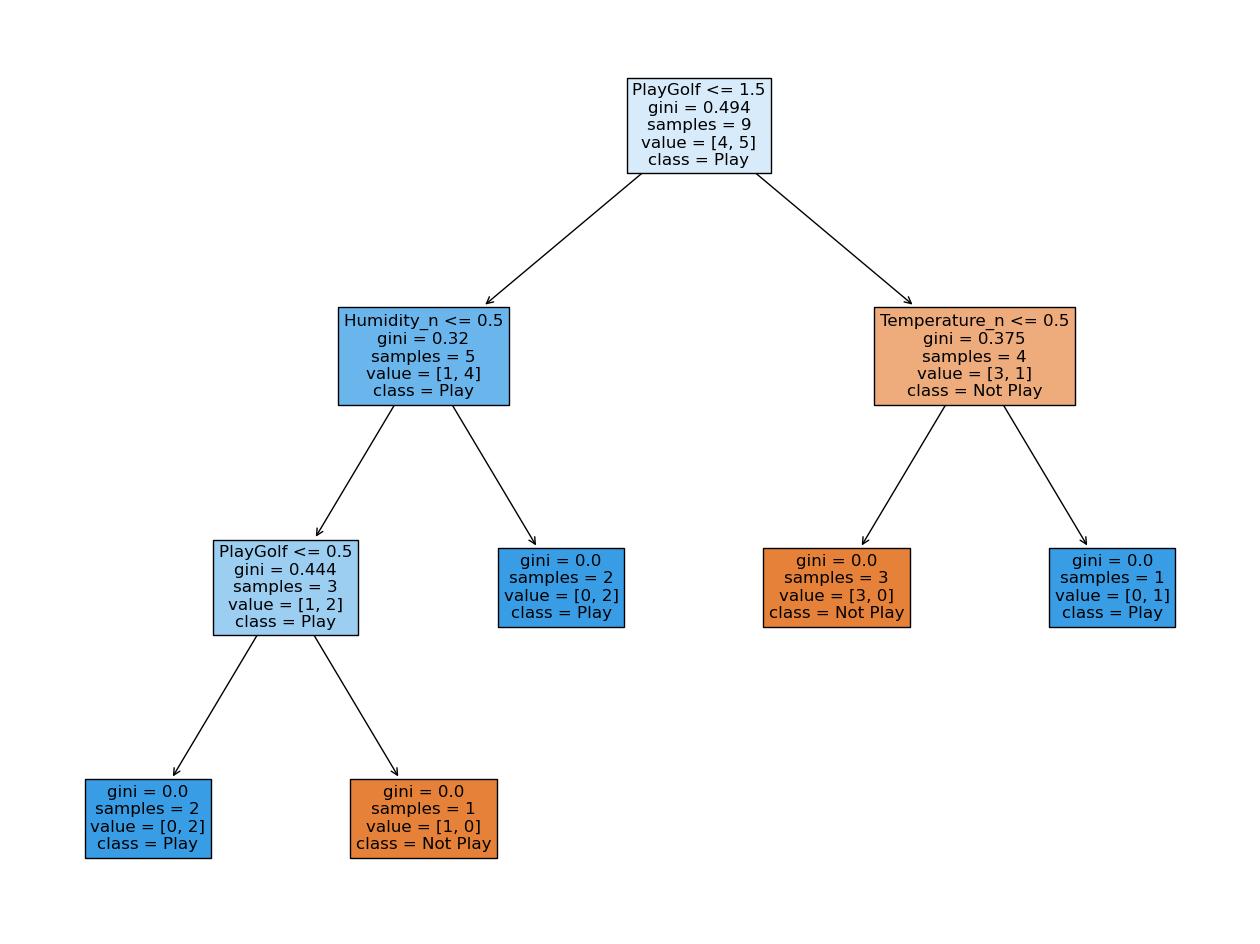

In [56]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=new_df.columns, fontsize=12, filled=True, 
              class_names=['Not Play', 'Play'])